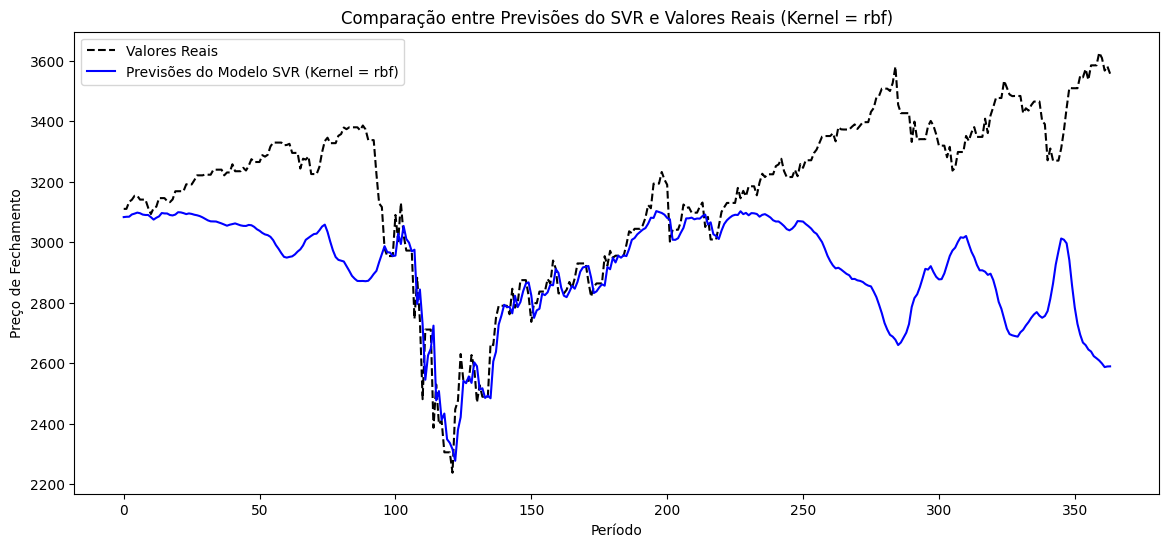

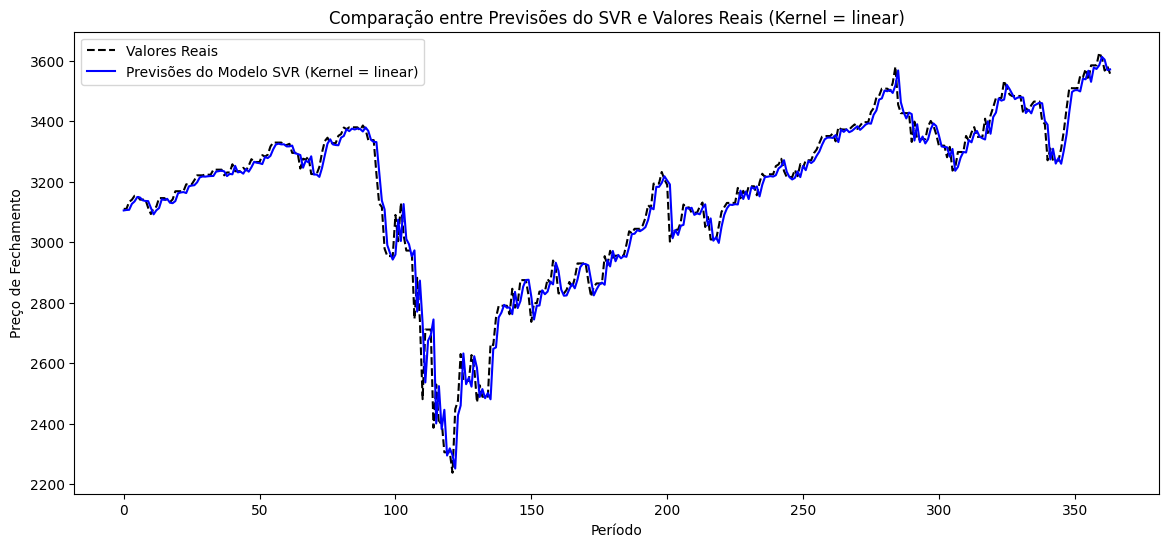

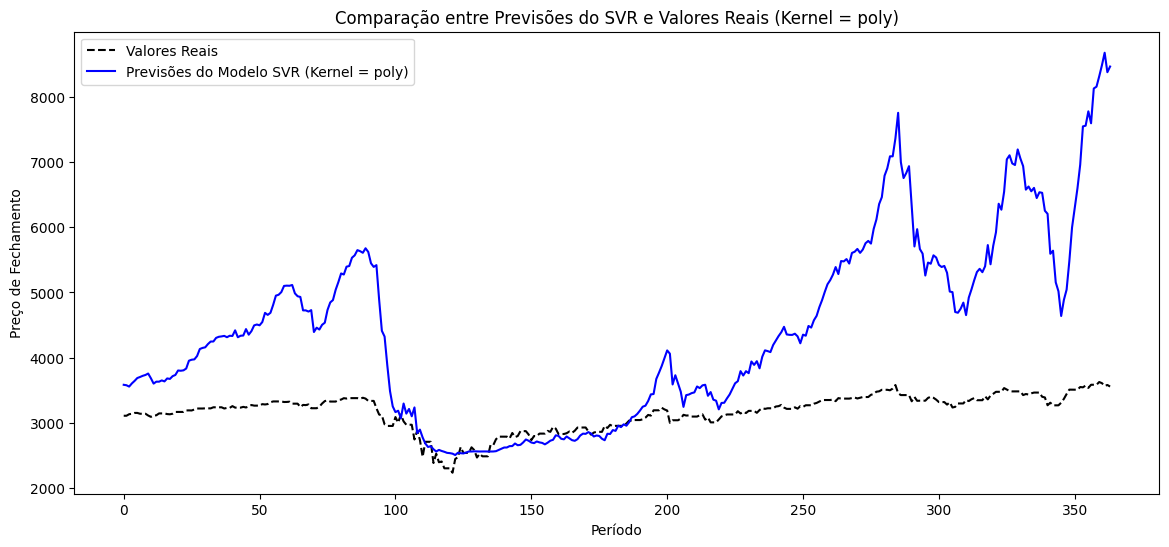

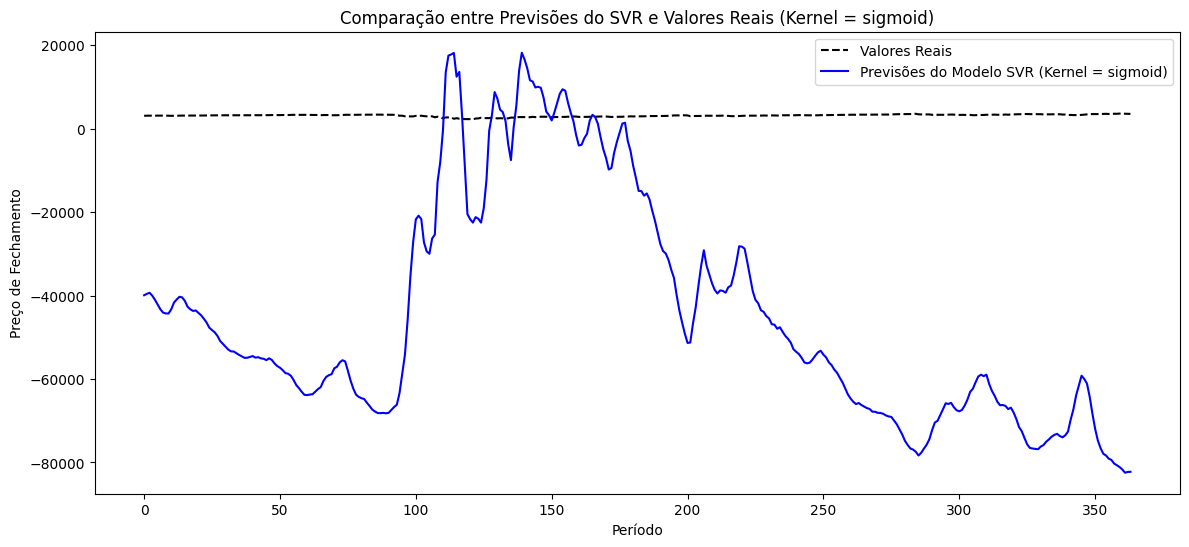

Erro Quadrado Médio (MSE) para o kernel 'rbf': 139071.63
Erro Quadrado Médio (MSE) para o kernel 'linear': 2592.00
Erro Quadrado Médio (MSE) para o kernel 'poly': 2956104.68
Erro Quadrado Médio (MSE) para o kernel 'sigmoid': 3014300438.07


In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Importação dos dados
df = pd.read_csv("yahoo_stock.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Selecionando a coluna 'Close' para análise
close = df['Close']

# Função para preparar dados de série temporal com janela de lag
def prepararModelo(series, lag=5):
    X, y = [], []
    for i in range(lag, len(series)):
        X.append(series[i-lag:i])
        y.append(series[i])
    return np.array(X), np.array(y)

# Preparação dos dados com uma janela de 5 dias
lag = 5
X, y = prepararModelo(close.values, lag)

# Divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Escalonamento dos dados
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train = scaler.fit_transform(y_train).flatten()
y_test = scaler.transform(y_test).flatten()

# Comparação de diferentes kernels
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
mse_results = {}

for kernel in kernels:
    # Treinamento do modelo SVR com o kernel específico
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred = svr.predict(X_test)
    y_pred_inverted = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()  # Reverter o escalonamento
    y_test_inverted = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()  # Reverter o escalonamento dos valores reais de teste

    # Cálculo do erro quadrado médio (MSE)
    mse = mean_squared_error(y_test_inverted, y_pred_inverted)
    mse_results[kernel] = mse

    # Plotagem das previsões versus valores reais para o kernel atual
    plt.figure(figsize=(14, 6))
    plt.plot(y_test_inverted, color='black', linestyle='--', label='Valores Reais')
    plt.plot(y_pred_inverted, color='blue', label=f'Previsões do Modelo SVR (Kernel = {kernel})')
    plt.title(f'Comparação entre Previsões do SVR e Valores Reais (Kernel = {kernel})')
    plt.xlabel('Período')
    plt.ylabel('Preço de Fechamento')
    plt.legend()
    plt.show()

# Imprimir os resultados do MSE para cada kernel
for kernel, mse in mse_results.items():
    print(f"Erro Quadrado Médio (MSE) para o kernel '{kernel}': {mse:.2f}")
